In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'svg'


/home/apurvnit/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'label': 'cfg/coco.names',
    'threshold': 0.3,
    'gpu': 1.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing /home/apurvnit/Projects/darkflow/cfg/yolo.cfg
Loading /home/apurvnit/Projects/darkflow/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.10170555114746094s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | 

In [10]:
img = cv2.imread('cat.png', cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 347, 'y': 510},
  'confidence': 0.94746834,
  'label': 'cat',
  'topleft': {'x': 239, 'y': 85}}]

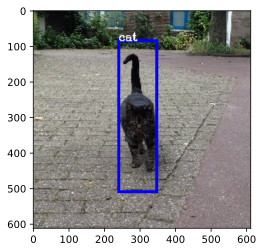

In [13]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])

label = result[0]['label']
img = cv2.rectangle(img, tl, br, (255,0,0), 7)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
plt.imshow(img)
plt.show()